Loaded Data:
      sky airtemp humidity    wind water forcast enjoysport
0  sunny    warm   normal  strong  warm    same        yes
1  sunny    warm     high  strong  warm    same        yes
2  rainy    cold     high  strong  warm  change         no
3  sunny    warm     high  strong  cool  change        yes
Column Names:
 Index(['sky', 'airtemp', 'humidity', 'wind', 'water', 'forcast', 'enjoysport'], dtype='object')


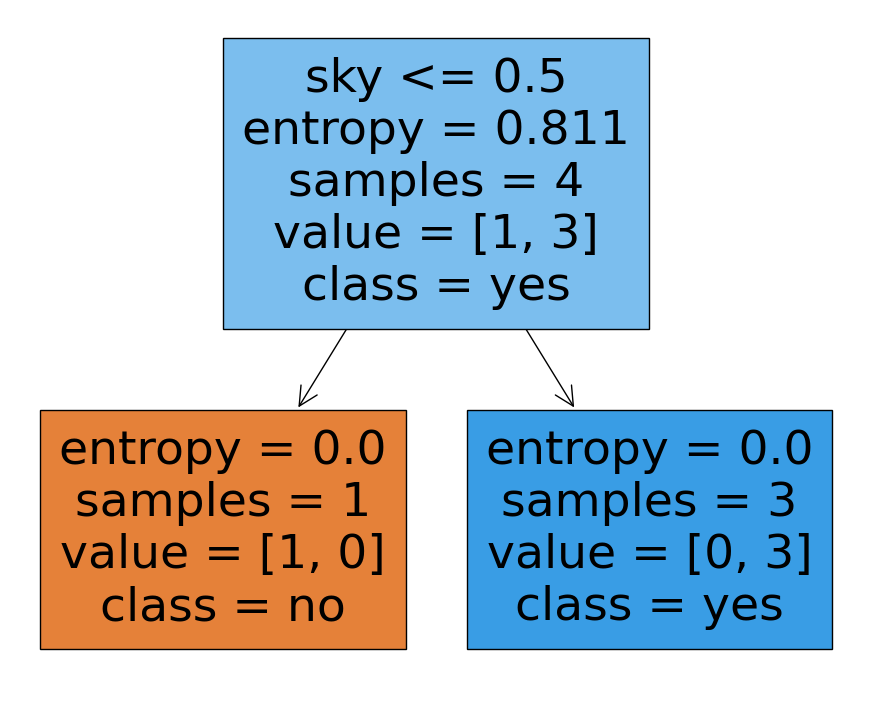

In [27]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
import matplotlib.pyplot as plt

# Load the data (Ensure the file path is correct)
data = pd.read_csv('/content/enjoysports.csv')
print("Loaded Data:\n", data)

# Print the actual column names to identify the target column
print("Column Names:\n", data.columns)

# Initialize LabelEncoders for each column
label_encoders = {}
for col in data.columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))  # Encoding categorical data as numbers
    label_encoders[col] = le

# After printing column names, identify the correct name for "Enjoy sports"
# Replace 'Enjoy sports' with the actual name you observe from print(data.columns)

# Let's assume the correct column name is "Enjoy Sport" based on the output
X = data.drop(columns=["enjoysport"])  # Use the correct column name
y = data["enjoysport"]  # Correct the target column

# Train a decision tree classifier using entropy as the criterion
cf = tree.DecisionTreeClassifier(criterion="entropy")
cf = cf.fit(X, y)

# Plot the decision tree
plt.figure(figsize=(11, 9))
tree.plot_tree(cf, feature_names=X.columns, class_names=le.classes_, filled=True)
plt.show()
